In [1]:
import tensorflow as tf
from pathlib import Path
import tarfile
from urllib.request import urlretrieve
import os
import numpy as np
import matplotlib.pyplot as plt

# Get data

In [2]:
def get_data(path):
    DOWNLOAD_ROOT = "http://download.tensorflow.org/data/quickdraw_tutorial_dataset_v1.tar.gz"
    FILENAME = "quickdraw_tutorial_dataset_v1.tar.gz"
    ROOT_PATH = Path(path)
    FOLDER_PATH = ROOT_PATH / "quickdraw_tutorial_dataset_v1"
    if not os.path.exists(FOLDER_PATH):
        os.makedirs(FOLDER_PATH, exist_ok=True)
        FILEPATH = ROOT_PATH / FILENAME
        path, headers = urlretrieve(DOWNLOAD_ROOT, FILEPATH)
        with tarfile.open(FILEPATH, "r") as f:
            f.extractall(FOLDER_PATH)

In [3]:
ROOT_PATH = Path("../data/")
FOLDER_PATH = ROOT_PATH / "quickdraw_tutorial_dataset_v1"

In [4]:
get_data(ROOT_PATH)

In [5]:
train_filepaths = list(FOLDER_PATH.glob("training*"))[:-1]
train_classes_path = list(FOLDER_PATH.glob("training*"))[-1]
valid_filepaths = list(FOLDER_PATH.glob("eval*"))[:-1]
valid_classes_path = list(FOLDER_PATH.glob("eval*"))[-1]

In [6]:
train_filepaths

[WindowsPath('../data/quickdraw_tutorial_dataset_v1/training.tfrecord-00000-of-00010'),
 WindowsPath('../data/quickdraw_tutorial_dataset_v1/training.tfrecord-00001-of-00010'),
 WindowsPath('../data/quickdraw_tutorial_dataset_v1/training.tfrecord-00002-of-00010'),
 WindowsPath('../data/quickdraw_tutorial_dataset_v1/training.tfrecord-00003-of-00010'),
 WindowsPath('../data/quickdraw_tutorial_dataset_v1/training.tfrecord-00004-of-00010'),
 WindowsPath('../data/quickdraw_tutorial_dataset_v1/training.tfrecord-00005-of-00010'),
 WindowsPath('../data/quickdraw_tutorial_dataset_v1/training.tfrecord-00006-of-00010'),
 WindowsPath('../data/quickdraw_tutorial_dataset_v1/training.tfrecord-00007-of-00010'),
 WindowsPath('../data/quickdraw_tutorial_dataset_v1/training.tfrecord-00008-of-00010'),
 WindowsPath('../data/quickdraw_tutorial_dataset_v1/training.tfrecord-00009-of-00010')]

In [7]:
train_data = tf.data.TFRecordDataset(train_filepaths).shuffle(1000).batch(32)
valid_data = tf.data.TFRecordDataset(valid_filepaths).batch(32)

In [8]:
with open(valid_classes_path) as valid_classes_file:
    valid_classes = [i.strip() for i in valid_classes_file.readlines()]
    
with open(train_classes_path) as train_classes_file:
    train_classes = [i.strip() for i in train_classes_file.readlines()]

In [9]:
train_classes == valid_classes

True

In [10]:
train_classes

['garden hose',
 'lighter',
 'penguin',
 'tractor',
 'sheep',
 'skateboard',
 'mountain',
 'mouse',
 'chandelier',
 'guitar',
 'roller coaster',
 'owl',
 'toilet',
 'map',
 'snail',
 'yoga',
 'spoon',
 'camera',
 'telephone',
 'bench',
 'pig',
 'lion',
 'skull',
 'hand',
 'raccoon',
 'beard',
 'church',
 'animal migration',
 'whale',
 'sun',
 'washing machine',
 'airplane',
 'megaphone',
 'sleeping bag',
 'jail',
 'fire hydrant',
 'car',
 'barn',
 'swing set',
 'rake',
 'paintbrush',
 'van',
 'dragon',
 'sailboat',
 'compass',
 'duck',
 'hat',
 'kangaroo',
 'donut',
 'crocodile',
 'coffee cup',
 'cooler',
 'waterslide',
 'feather',
 'firetruck',
 'stereo',
 'leg',
 'tree',
 'pillow',
 'purse',
 'hourglass',
 'ear',
 'broccoli',
 'goatee',
 'moon',
 'bridge',
 'peas',
 'squiggle',
 'foot',
 'camouflage',
 'string bean',
 'pants',
 'lipstick',
 'jacket',
 'hockey puck',
 'truck',
 'table',
 'hammer',
 'The Great Wall of China',
 'paint can',
 'fireplace',
 'leaf',
 'apple',
 'beach',
 'w

In [11]:
feature_descriptions = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
}

for item in train_data.take(1):
    data = item

In [12]:
parsed_example = tf.io.parse_example(item, feature_descriptions)

In [13]:
value = tf.sparse.to_dense(parsed_example["ink"])

In [14]:
parsed_example["shape"]

<tf.Tensor: shape=(32, 2), dtype=int64, numpy=
array([[ 42,   3],
       [ 14,   3],
       [ 34,   3],
       [ 35,   3],
       [ 36,   3],
       [ 79,   3],
       [ 58,   3],
       [ 42,   3],
       [ 66,   3],
       [ 28,   3],
       [ 47,   3],
       [ 45,   3],
       [ 83,   3],
       [ 64,   3],
       [ 49,   3],
       [ 22,   3],
       [  9,   3],
       [ 76,   3],
       [ 74,   3],
       [ 63,   3],
       [ 46,   3],
       [ 49,   3],
       [106,   3],
       [ 31,   3],
       [ 16,   3],
       [ 52,   3],
       [ 43,   3],
       [ 21,   3],
       [ 68,   3],
       [ 45,   3],
       [ 74,   3],
       [ 40,   3]], dtype=int64)>

In [15]:
tf.reshape(value, shape=[tf.size(data), -1, 3])

<tf.Tensor: shape=(32, 106, 3), dtype=float32, numpy=
array([[[-0.14516129,  0.05490196,  0.        ],
        [-0.02419355,  0.04313725,  0.        ],
        [ 0.02419355,  0.0784314 ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[-0.00392157, -0.25      ,  0.        ],
        [ 0.01568628, -0.03225809,  0.        ],
        [ 0.1254902 , -0.03225803,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[-0.08661418,  0.07058824,  0.        ],
        [-0.01574803,  0.04313725,  0.        ],
        [ 0.03149606,  0.8509804 ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       ...,

      

In [125]:
def parse_data(data):
    feature_descriptions = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
    }
    parsed_example = tf.io.parse_example(data, feature_descriptions)
    ink = tf.sparse.to_dense(parsed_example["ink"])
    sketches = tf.reshape(ink, shape=[tf.size(data), -1, 3])
    shape = parsed_example["shape"]
    labels = parsed_example["class_index"]
    return sketches, shape, labels
    

def load_data(filepaths, batch_size):
    data = tf.data.TFRecordDataset(train_filepaths, num_parallel_reads=5).shuffle(10000).batch(batch_size)    
    data = data.map(parse_data, num_parallel_calls=5)
    return data.prefetch(1)

In [126]:
train_data = load_data(train_filepaths, 32)
valid_data = load_data(valid_filepaths, 32)

In [128]:
for item in train_data.take(1):
    data = item

<tf.Tensor: shape=(32, 173, 3), dtype=float32, numpy=
array([[[-0.16929138, -0.01704544,  0.        ],
        [-0.5511811 ,  0.        ,  0.        ],
        [-0.04724409, -0.00568181,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.00784314, -0.02551022,  0.        ],
        [-0.01568627, -0.02040815,  0.        ],
        [-0.07843137, -0.02551021,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[-0.15183246,  0.07058823,  0.        ],
        [-0.08376963,  0.10588235,  0.        ],
        [-0.01570681,  0.05490197,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       ...,

      

In [24]:
def draw(sketch, label=None):
    origin = np.array([[0., 0., 0.]])
    sketch = np.r_[origin, sketch]
    stroke_end_indices = np.argwhere(sketch[:, -1]==1.)[:, 0]
    coordinates = np.cumsum(sketch[:, :2], axis=0)
    strokes = np.split(coordinates, stroke_end_indices + 1)
    for stroke in strokes[:-1]:
        plt.plot(stroke[:, 0], -stroke[:, 1], ".-")
    plt.title(train_classes[int(label.numpy())] if label is not None else None)

In [25]:
def draw_sketches(data):
    sketches, shapes, labels = data
    plt.figure(figsize=(24, 40))
    for i in range(len(sketches)):
        sketch = sketches[i]
        label = labels[i]
        plt.subplot(8, 4, i+1)
        draw(sketch, label)
        

In [28]:
for item in train_data.take(1):
    data = item

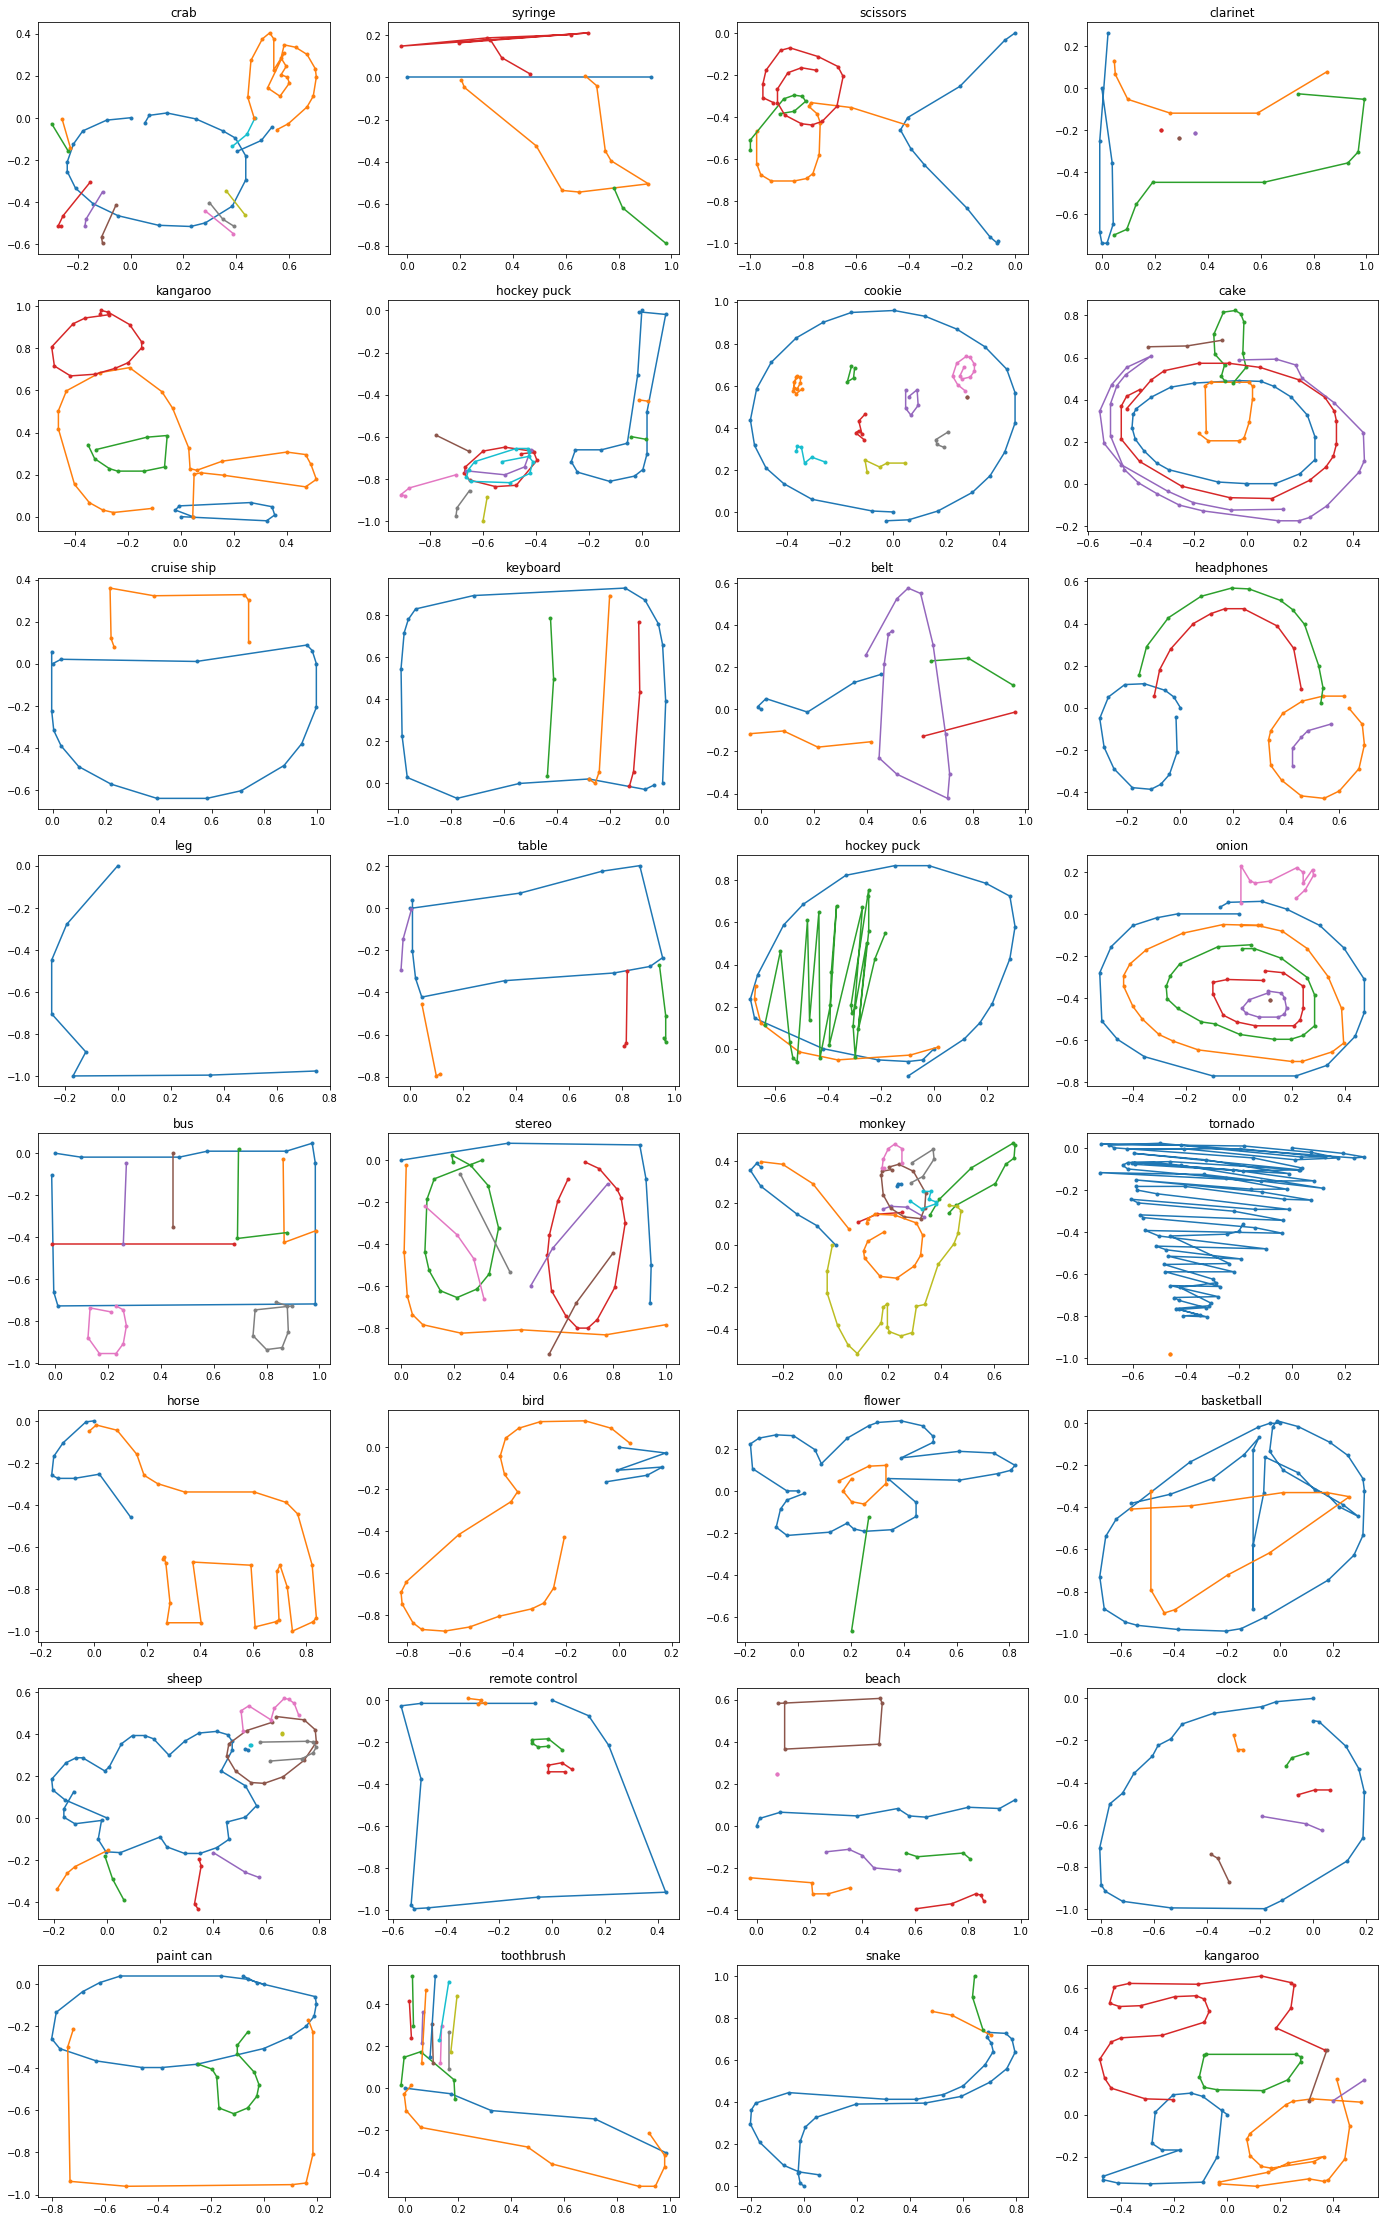

In [37]:
draw_sketches(data)

In [38]:
l = []
for data in train_data.take(1000):
    _, lengths, _ = data
    l.extend(lengths.numpy()[:,0])

(array([1.732e+03, 8.838e+03, 9.208e+03, 6.005e+03, 3.119e+03, 1.480e+03,
        7.430e+02, 3.340e+02, 2.030e+02, 1.050e+02, 7.400e+01, 3.600e+01,
        3.200e+01, 1.200e+01, 1.700e+01, 9.000e+00, 1.000e+01, 7.000e+00,
        4.000e+00, 4.000e+00]),
 array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
        165., 180., 195., 210., 225., 240., 255., 270., 285., 300.]),
 <BarContainer object of 20 artists>)

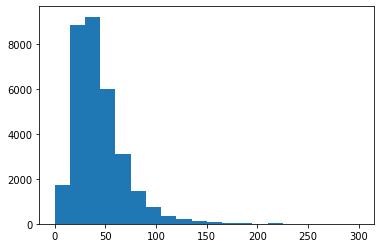

In [39]:
plt.hist(x=l, bins=20, range=(0,300))

In [40]:
# As most datasets has max of 100 strokes , so we will crop the dataset to a max of 100 strokes

In [41]:
def crop_long_sketches(dataset, max_length=100):
    return dataset.map(lambda inks, lengths, labels: (inks[:, :max_length], labels[:,0]))

train_data = load_data(train_filepaths, 32)
valid_data = load_data(valid_filepaths, 32)
cropped_train_set = crop_long_sketches(train_data)
cropped_valid_set = crop_long_sketches(valid_data)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(None,3)),
    tf.keras.layers.Conv1D(32, kernel_size=5, strides=2, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(64, kernel_size=5, strides=2, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(128, kernel_size=3, strides=2, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(len(train_classes), activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy", "sparse_top_k_categorical_accuracy"],
)

model.fit(cropped_train_set, epochs=2, validation_data=cropped_valid_set)

# Creating a sequence to sequence RNN for a particular set

In [279]:
def parse_data(data):
    feature_descriptions = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
    }
    parsed_example = tf.io.parse_example(data, feature_descriptions)
    ink = tf.sparse.to_dense(parsed_example["ink"])
    sketches = tf.reshape(ink, shape=[tf.size(data), -1, 3])
    shape = parsed_example["shape"]
    labels = parsed_example["class_index"]
    return sketches, shape, labels

def check_data(sketches, shape, labels, index):
    if labels == index:
        return True
    return False
    

def load_data(filepaths, index=1):
    data = tf.data.TFRecordDataset(train_filepaths, num_parallel_reads=5).shuffle(100000)
    data = data.filter(lambda x:filter_data(x, index))
    data = data.map(parse_data, num_parallel_calls=5)
#     data = data.apply(tf.data.Dataset.unbatch)
#     data = data.filter(lambda sketches, shape, labels: check_data(sketches, shape, labels, index))
    return data

In [280]:
type(train_data)

tensorflow.python.data.ops.dataset_ops.FilterDataset

In [281]:
train_data = load_data(train_filepaths, 32)
valid_data = load_data(valid_filepaths, 32)

AttributeError: in user code:

    File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_24016\93674133.py", line 27, in None  *
        lambda x:filter_data(x, index)
    File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_24016\226545943.py", line 16, in filter_data  *
        print(labels.numpy())

    AttributeError: 'Tensor' object has no attribute 'numpy'


In [ ]:
for item in train_data.take(1):
    data = item

In [165]:
tf.Tensor.

InvalidArgumentError: cannot compute Pack as input #1(zero-based) was expected to be a float tensor but is a int64 tensor [Op:Pack] name: packed